In [1]:
from __future__ import print_function 
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('~/Desktop/datasets/Skin_NonSkin.txt', delimiter='\t', names=['R','G','B','is_skin'])
X = df[['R','G','B']]
Y = df['is_skin']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
Y_train = np.delete(Y_train, [0], axis=1)
Y_test = np.delete(Y_test, [0], axis=1)

Using TensorFlow backend.


(164188, 3)


In [2]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Loss:',score[0])
print('Accuracy:',score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 265,730
Trainable params: 265,730
Non-trainable params: 0
_________________________________________________________________
Train on 147769 samples, validate on 16419 samples
Epoch 1/5
147769/147769 [==============================] - 9s 63us/step - loss: 3.356

In [45]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('human.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[0], img.shape[1]
reshaped = img.reshape(h*w, 3)
y = model.predict(reshaped)
mask = np.array([np.argmax(y[i]) for i in range(len(y))])
mask = mask.reshape(h, w)
print(mask.shape)

(168, 299)


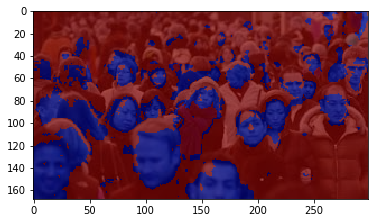

In [46]:
plt.figure()
plt.imshow(img, 'gray', interpolation='none')
plt.imshow(mask, 'jet', interpolation='none', alpha=0.7)
plt.show()